In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
# uploaded = files.upload()
df = pd.read_csv("predictive_maintenance.csv")
df = df.drop(["UDI", "Product ID"], axis=1)
df = df.replace({'L': 1, 'M': 2, 'H': 3})

print(df.sample(6))

      Type  Air temperature [K]  Process temperature [K]  \
3075     2                300.1                    309.2   
1173     3                297.1                    308.0   
2724     2                299.8                    309.3   
68       1                298.8                    308.9   
9463     2                298.5                    309.3   
5828     1                301.3                    311.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
3075                    1385         46.1              120       0   
1173                    1559         38.8              229       0   
2724                    1470         42.7              119       0   
68                      1527         32.4              189       0   
9463                    1552         36.8              133       0   
5828                    1504         39.1                2       0   

     Failure Type  
3075   No Failure  
1173   No Failure  
2724   No Failure  
68     N

In [4]:
display(df.shape)
display(df.size)

(10000, 8)

80000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


In [6]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,1.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,2.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,3.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df['Type'].value_counts()

Type
1    6000
2    2997
3    1003
Name: count, dtype: int64

In [8]:
df.apply(lambda x: x.nunique())

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Target                       2
Failure Type                 6
dtype: int64

In [9]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [10]:
mapping = {
    1: "No Failure",
    2: "Heat Dissipation Failure",
    3: "Power Failure",
    4: "Overstrain Failure",
    5: "Tool Wear Failure",
    6: "Random Failures"
}

df["Failure Type"] = df["Failure Type"].replace(mapping)

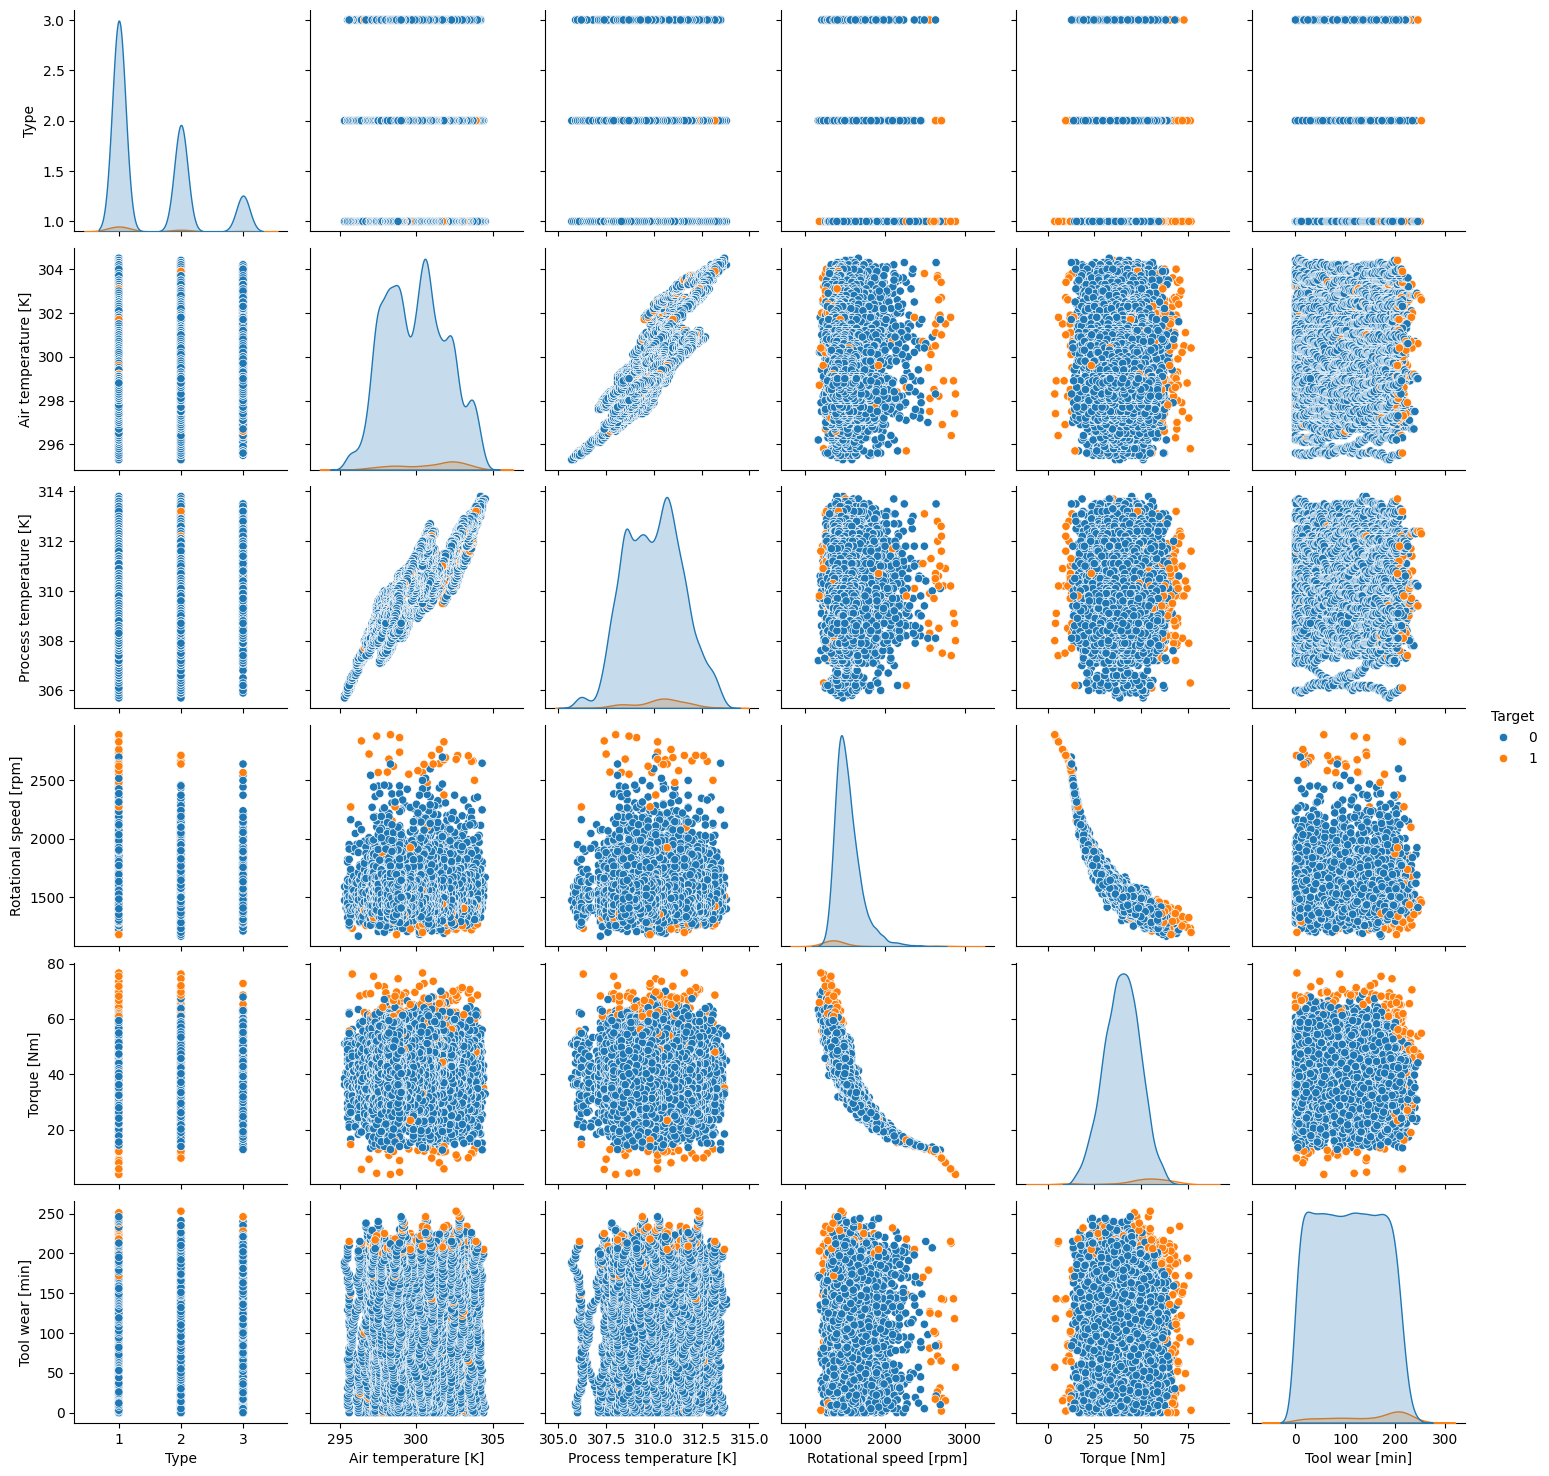

In [11]:
sns.pairplot(df, hue='Target')

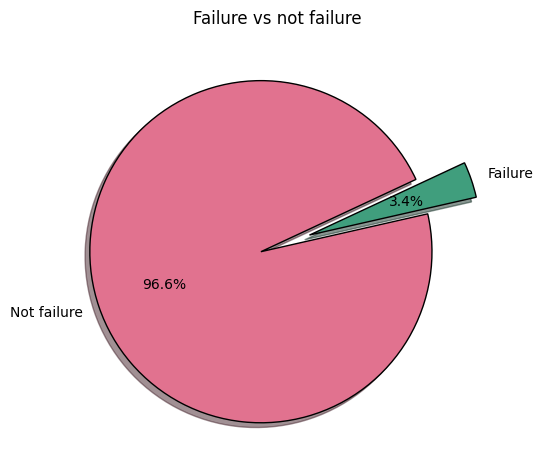

In [12]:
colors = ['#E1728F', '#409E7D']
plt.pie(df['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        colors=colors)
plt.title('Failure vs not failure')
plt.tight_layout()
plt.show()

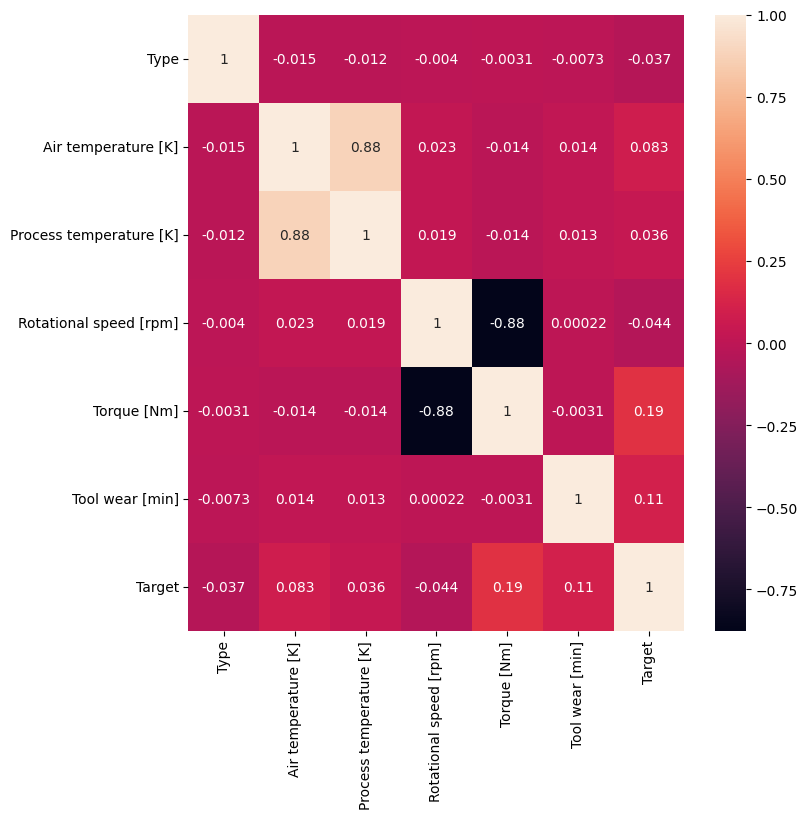

In [13]:
numeric_df = df.drop(columns=['Failure Type'])

plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [14]:
X = df.drop(columns=["Target", "Failure Type"], axis=1)
y = df[["Failure Type"]]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)
training_accuracy = round(logistic_regression_model.score(X_train, y_train) * 100, 2)
test_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy: {}%".format(training_accuracy))
print("Test Accuracy: {}%".format(test_accuracy))

Training Accuracy: 96.44%
Test Accuracy: 96.9%


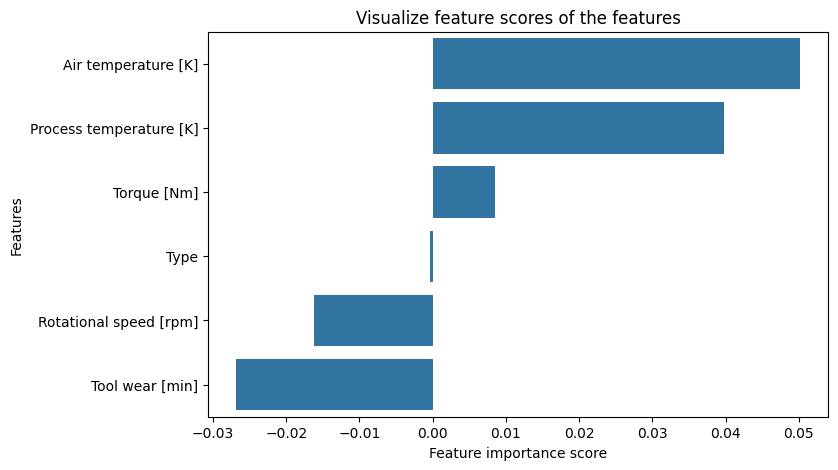

In [17]:
importance = logistic_regression_model.coef_[0]
imp_scores = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

imp_scores

f, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x=imp_scores, y=imp_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(imp_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [20]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

def predict_logistic_regression(X):
    X = np.array(X).reshape(1, -1)
    return logistic_regression_model.predict(X)

def test_logistic_regression():
    type_of_material = float(input("Enter the type of material used: "))
    air_temperature = float(input("E30nter air temperature in Kelvin: "))
    process_temperature = float(input("Enter process temperature in Kelvin: "))
    rotational_speed = float(input("Enter rotational speed: "))
    torque = float(input("Enter torque: "))
    tool_wear = float(input("Enter tool wear: "))

    result = predict_logistic_regression([type_of_material, air_temperature, process_temperature, rotational_speed, torque, tool_wear])

    print("Predicted machine failure label: ", result)

test_logistic_regression()

Enter the type of material used: 1
E30nter air temperature in Kelvin: 39
Enter process temperature in Kelvin: 78
Enter rotational speed: 68
Enter torque: 46
Enter tool wear: 5
Predicted machine failure label:  ['Heat Dissipation Failure']


In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
training_accuracy_rf = round(random_forest_model.score(X_train, y_train) * 100, 2)
test_accuracy_rf = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy (Random Forest): {}%".format(training_accuracy_rf))
print("Test Accuracy (Random Forest): {}%".format(test_accuracy_rf))

Training Accuracy (Random Forest): 99.99%
Test Accuracy (Random Forest): 98.45%


In [22]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

def predict_rando1272m_forest(X):
    X = np.array(X).reshape(1, -1)
    return random_forest_model.predict(X)

def test_random_forest():
    type_of_material = float(input("Enter the type of material used: "))
    air_temperature = float(input("Enter air temperature in Kelvin: "))
    process_temperature = float(input("Enter process temperature in Kelvin: "))
    rotational_speed = float(input("Enter rotational speed: "))
    torque = float(input("Enter torque: "))
    tool_wear = float(input("Enter tool wear: "))

    result = predict_random_forest([type_of_material, air_temperature, process_temperature, rotational_speed, torque, tool_wear])

    print("Predicted machine failure label: ", result)

test_random_forest()

KeyboardInterrupt: Interrupted by user

In [ ]:
feature_scores = pd.Series(random_forest_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()